In [1]:
#1. Import thư viện cần thiết
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
import sklearn.preprocessing
import datetime
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [2]:
#2. Đọc dữ liệu từ file
df = pd.read_csv('/content/LG.csv')

In [3]:
#3. Làm sạch dữ liệu
df['Open'] = df['Open'].replace(0, df['Open'].mean())
df['High'] = df['High'].replace(0, df['High'].mean())
df['Low'] = df['Low'].replace(0, df['Low'].mean())
df['Close'] = df['Close'].replace(0, df['Close'].mean())
df

,Date,Close,Open,High,Low
0,2019-03-01,101952.316347,102080.608868,103329.880874,100780.079418
1,2019-03-02,101952.316347,102080.608868,103329.880874,100780.079418
2,2019-03-03,101952.316347,102080.608868,103329.880874,100780.079418
3,2019-03-04,71200.000000,70800.000000,71800.000000,70800.000000
4,2019-03-05,71300.000000,70900.000000,72000.000000,70300.000000
...,...,...,...,...,...
1915,2024-05-28,109300.000000,97300.000000,109500.000000,97200.000000
1916,2024-05-29,110500.000000,112500.000000,113900.000000,109000.000000
1917,2024-05-30,106300.000000,109500.000000,111100.000000,106200.000000
1918,2024-05-31,104800.000000,107500.000000,109900.000000,104800.000000


In [4]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Chọn features và target
X = df[['Open', 'High', 'Low']]
y = df['Close']

train_size = int(0.6 * len(df))
test_size = int(0.4 * len(df))

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Khởi tạo mô hình
model = XGBRegressor()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán kết quả trên tập train và tập test
train_predict = model.predict(X_train)
predictions_xgb = model.predict(X_test)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính Mean Absolute Error
mae = mean_absolute_error(y_test, predictions_xgb)
print(f"Mean Absolute Error (MAE): {mae}")

# Tính Mean Squared Error
mse = mean_squared_error(y_test, predictions_xgb)
print(f"Mean Squared Error (MSE): {mse}")

# Tính R-squared
r2 = r2_score(y_test, predictions_xgb)
print(f"R-squared (R2): {r2}")

# Tính Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Tính Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, predictions_xgb)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Error (MAE): 1824.519788242612
Mean Squared Error (MSE): 9434073.32404243
R-squared (R2): 0.9007239261241754
Root Mean Squared Error (RMSE): 3071.493663357037
Mean Absolute Percentage Error (MAPE): 1.746355751132539%


**Dự đoán 30 ngày tiếp theo**

In [6]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 30):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

101952.79
4
1 day input [103329.88087359 100780.0794176  101952.7890625 ]
1 day output [100123.984]
2 day input [100780.0794176 101952.7890625 100123.984375 ]
2 day output [95827.055]
3 day input [101952.7890625 100123.984375   95827.0546875]
3 day output [95827.055]
4 day input [100123.984375   95827.0546875  95827.0546875]
4 day output [96178.086]
5 day input [95827.0546875 95827.0546875 96178.0859375]
5 day output [95956.766]
6 day input [95827.0546875 96178.0859375 95956.765625 ]
6 day output [95956.766]
7 day input [96178.0859375 95956.765625  95956.765625 ]
7 day output [95956.766]
8 day input [95956.765625 95956.765625 95956.765625]
8 day output [95956.766]
9 day input [95956.765625 95956.765625 95956.765625]
9 day output [95956.766]
10 day input [95956.765625 95956.765625 95956.765625]
10 day output [95956.766]
11 day input [95956.765625 95956.765625 95956.765625]
11 day output [95956.766]
12 day input [95956.765625 95956.765625 95956.765625]
12 day output [95956.766]
13 day in

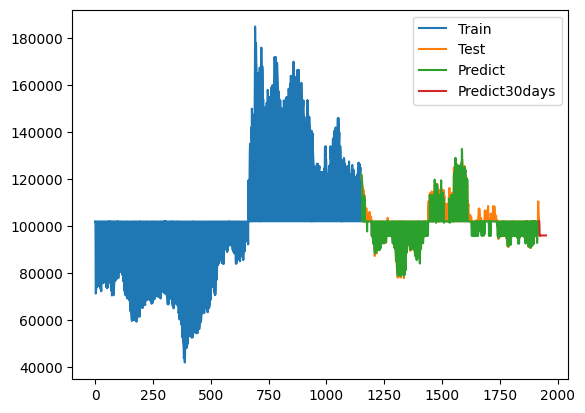

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output), step=1)
plt.plot(prediect_data_index, lst_output)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])
plt.show()

**Dự đoán 60 ngày tiếp theo**

In [8]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_60 = []
n_steps = 100
i = 0
while(i < 60):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[:3])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_60.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i = i + 1

101952.79
4
1 day input [102080.6088683  103329.88087359 100780.0794176 ]
1 day output [101952.79]
2 day input [103329.88087359 100780.0794176  101952.7890625 ]
2 day output [100123.984]
3 day input [100780.0794176 101952.7890625 101952.7890625]
3 day output [95827.055]
4 day input [101952.7890625 101952.7890625 100123.984375 ]
4 day output [95827.055]
5 day input [101952.7890625 100123.984375   95827.0546875]
5 day output [95827.055]
6 day input [100123.984375   95827.0546875  95827.0546875]
6 day output [96178.086]
7 day input [95827.0546875 95827.0546875 95827.0546875]
7 day output [95956.766]
8 day input [95827.0546875 95827.0546875 96178.0859375]
8 day output [95956.766]
9 day input [95827.0546875 96178.0859375 95956.765625 ]
9 day output [95956.766]
10 day input [96178.0859375 95956.765625  95956.765625 ]
10 day output [95956.766]
11 day input [95956.765625 95956.765625 95956.765625]
11 day output [95956.766]
12 day input [95956.765625 95956.765625 95956.765625]
12 day output [95

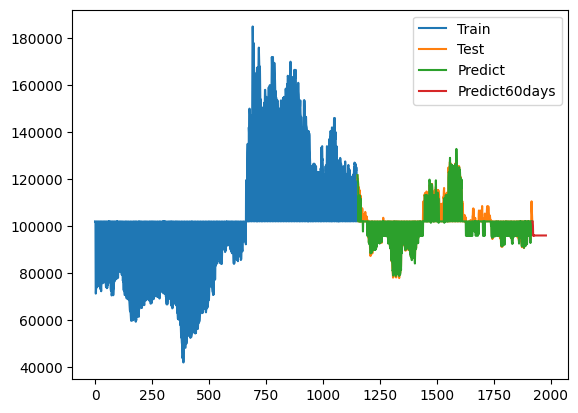

In [9]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output_60 to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output_60), step=1)
plt.plot(prediect_data_index, lst_output_60)

plt.legend(['Train', 'Test', 'Predict', 'Predict60days'])
plt.show()

**Dự đoán 90 ngày tiếp theo**

In [10]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_90 = []
n_steps = 100
i = 0
while(i < 90):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_90.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i = i + 1

101952.79
4
1 day input [103329.88087359 100780.0794176  101952.7890625 ]
1 day output [100123.984]
2 day input [100780.0794176 101952.7890625 100123.984375 ]
2 day output [95827.055]
3 day input [101952.7890625 100123.984375   95827.0546875]
3 day output [95827.055]
4 day input [100123.984375   95827.0546875  95827.0546875]
4 day output [96178.086]
5 day input [95827.0546875 95827.0546875 96178.0859375]
5 day output [95956.766]
6 day input [95827.0546875 96178.0859375 95956.765625 ]
6 day output [95956.766]
7 day input [96178.0859375 95956.765625  95956.765625 ]
7 day output [95956.766]
8 day input [95956.765625 95956.765625 95956.765625]
8 day output [95956.766]
9 day input [95956.765625 95956.765625 95956.765625]
9 day output [95956.766]
10 day input [95956.765625 95956.765625 95956.765625]
10 day output [95956.766]
11 day input [95956.765625 95956.765625 95956.765625]
11 day output [95956.766]
12 day input [95956.765625 95956.765625 95956.765625]
12 day output [95956.766]
13 day in

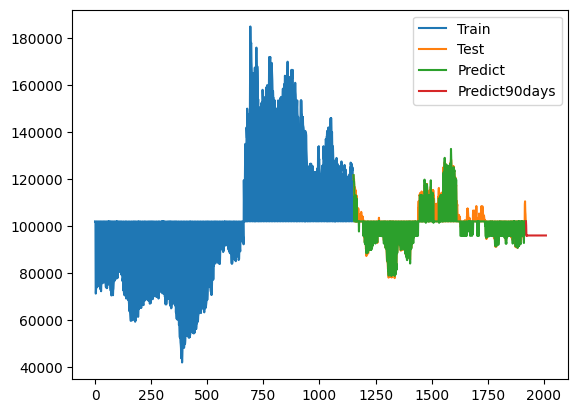

In [11]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output_60 to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output_90), step=1)
plt.plot(prediect_data_index, lst_output_90)

plt.legend(['Train', 'Test', 'Predict', 'Predict90days'])
plt.show()